In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [135]:
data_files = {
    "nosein_mouthout_1": "./sensor_data_nosein_mouthout_2_with_anomalies.csv",
    
    "nosein_noseout_1": "./sensor_data_nosein_noseout_1_with_anomalies.csv",
    "nosein_noseout_2": "./sensor_data_nosein_noseout_2_with_anomalies.csv",
    "nosein_noseout_3": "./sensor_data_nosein_noseout_3_with_anomalies.csv",
    "nosein_noseout_4": "./sensor_data_nosein_noseout_4_with_anomalies.csv",
    "nosein_noseout_5": "./sensor_data_nosein_noseout_5_with_anomalies.csv",
    "nosein_noseout_6": "./sensor_data_nosein_noseout_6_with_anomalies.csv",
    "nosein_noseout_7": "./sensor_data_nosein_noseout_7_with_anomalies.csv",
    "nosein_noseout_8": "./sensor_data_nosein_noseout_8_with_anomalies.csv", 
    "nosein_noseout_9": "./sensor_data_nosein_noseout_9_with_anomalies.csv", # latest: the most standard perfect record; 100K large size(audio, temp. hum)
    "nosein_noseout_10": "./sensor_data_nosein_noseout_10_with_anomalies.csv", # second largest 90k (audio, temp. hum)
}

recording_start_lines = {
    "nosein_mouthout_1": 120,
    "nosein_noseout_1": 90,
    "nosein_noseout_2": 193,
    "nosein_noseout_3": 189,
    "nosein_noseout_4": 317,
    "nosein_noseout_5": 85,
    "nosein_noseout_6": 1500,
    "nosein_noseout_7": 76,
    "nosein_noseout_8": 80,
    "nosein_noseout_9": 0,
    "nosein_noseout_10": 0,
}

anomaly_intervals_dict = {
    "nosein_mouthout_1": [
        (860, 1090),  # 1 anomaly interval
        (2100, 2250),  # 2 anomaly interval 
        (4930, 5160),  # 3 anomaly interval
        (6090, 6270), # 4 anomaly interval
        (7060, 7280), # 5 anomaly interval
        (8420, 8700)  # 6 anomaly interval
    ],
    "nosein_noseout_1": [
        (772, 1260),  # 1 anomaly interval
        (1960, 2180),  # 2 anomaly interval 
        (2560, 2810),  # 3 anomaly interval
        (3670, 4090), # 4 anomaly interval
        (5112, 5230), # 5 anomaly interval
        (6090, 6310), # 6 anomaly interval
        (6792, 7039) # 7 anomaly interval
    ],
    "nosein_noseout_2": [
        (2551, 2761),  # 1 anomaly interval
        (4741, 5091),  # 2 anomaly interval 
        (9071, 9501),  # 3 anomaly interval
        (10521, 10901), # 4 anomaly interval
        (14891, 15191), # 5 anomaly interval
        (19511, 19841)  # 6 anomaly interval
    ],
    "nosein_noseout_3": [
        (1161, 1361),  # 1 anomaly interval
        (2381, 2531),  # 2 anomaly interval 
        (4011, 4091),  # 3 anomaly interval
        (5541, 5841), # 4 anomaly interval
        (6831, 7051), # 5 anomaly interval
        (7981, 8141), # 6 anomaly interval
        (8931, 9081) # 7 anomaly interval
    ],
    "nosein_noseout_4": [
        (1327, 1577),  # 1 anomaly interval
        (2897, 2987),  # 2 anomaly interval 
        (3787, 3977),  # 3 anomaly interval
        (5197, 5387), # 4 anomaly interval
        (6417, 6537), # 5 anomaly interval
        (7797, 8037), # 6 anomaly interval
        (8537, 8697) # 7 anomaly interval
    ],
    "nosein_noseout_5": [
        (1515, 1795),  # 1 anomaly interval
        (3735, 3985),  # 2 anomaly interval 
        (10170, 10503),  # 3 anomaly interval
        (12215, 12455), # 4 anomaly interval
    ],
    "nosein_noseout_6": [
        (2130, 2490),  # 1 anomaly interval
        (7190, 7830),  # 2 anomaly interval 
        (11820, 12144),  # 3 anomaly interval
        (13320, 13600), # 4 anomaly interval
    ],
    "nosein_noseout_7": [
        (2936, 3316),  # 1 anomaly interval
        (6926, 7356),  # 2 anomaly interval 
        (8706, 9136),  # 3 anomaly interval
        (12146, 12616), # 4 anomaly interval
    ],
    "nosein_noseout_8": [
        (3580, 4020),  # 1 anomaly interval
        (7530, 8130),  # 2 anomaly interval 
        (11280, 11840),  # 3 anomaly interval
        (13950, 14290), # 4 anomaly interval
    ],
    "nosein_noseout_9": [
        (76791, 77441), # 1 anomaly interval
        (80141, 80861), # 2 anomaly interval
        (83431, 84431), # 3 anomaly interval
        (87601, 88401), # 4 anomaly interval
        (95971, 96846), # 5 anomaly interval
    ],
    "nosein_noseout_10": [
        (68101, 68621), # 1 anomaly interval
        (68911, 69261), # 2 anomaly interval
        (72301, 72601), # 3 anomaly interval
        (73561, 73951), # 4 anomaly interval
        (74591, 74931), # 5 anomaly interval
        (77881, 78471), # 6 anomaly interval
        (83291, 83621), # 7 anomaly interval
        (84631, 85161), # 8 anomaly interval
        (85461, 85821), # 9 anomaly interval
        (86771, 87121), # 10 anomaly interval
    ],
}


In [136]:

datafile = data_files["nosein_noseout_10"]
recording_start_line = recording_start_lines["nosein_noseout_10"]
# Anomaly intervals (start_line, end_line)
anomaly_intervals = anomaly_intervals_dict["nosein_noseout_10"]


anomalies = []
adj_anomaly_intervals = []

with open(datafile) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    next(readCSV)  # Skip the header row
    rows = list(readCSV)
    # print(rows)
    # Start from line recording_start_line where valid readings begin
    valid_rows = rows[recording_start_line:]
    
    # Extract timestamps for each anomaly interval
    for start_line, end_line in anomaly_intervals:
        # Adjust indices to account for the recording_start_line offset
        adj_start = start_line - recording_start_line
        adj_end = end_line - recording_start_line   
        adj_anomaly_intervals.append((adj_start, adj_end))

        # Extract timestamps between start and end lines
        for i in range(adj_start, adj_end + 1):
            if i < len(valid_rows):
                timestamp = valid_rows[i][0]  # Get timestamp from first column
                anomalies.append(timestamp)
                
print("adj_anomaly_intervals:", adj_anomaly_intervals)
print("Anomaly timestamps extracted:")
print(anomalies)
np_anomalies = np.asarray(anomalies)
print(np_anomalies)
print(np_anomalies.shape)


adj_anomaly_intervals: [(68101, 68621), (68911, 69261), (72301, 72601), (73561, 73951), (74591, 74931), (77881, 78471), (83291, 83621), (84631, 85161), (85461, 85821), (86771, 87121)]
Anomaly timestamps extracted:
['2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:26', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '2025-04-10 00:41:27', '20

In [137]:
print(np.asarray(valid_rows).shape)

(87530, 7)


In [138]:
# valid_rows = np.asarray(valid_rows[64000:])

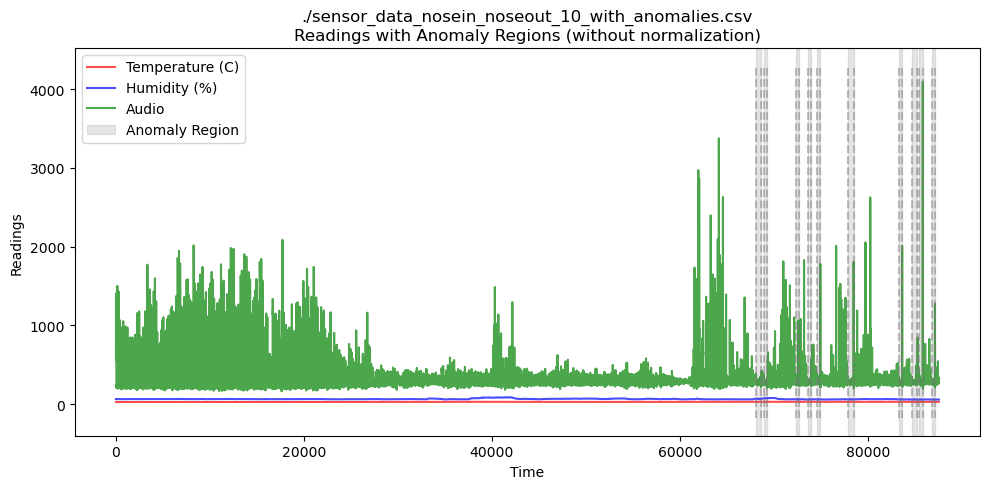

In [139]:
# Plot the data
t = []
temp_readings = []
hum_readings = []
audio_readings = []
# pressure_readings = []
# blood_oxygen_readings = []

for i, row in enumerate(valid_rows):
    if i > 0:  # Skip header
        t.append(i)
        audio_readings.append(float(row[1]))
        temp_readings.append(float(row[2]))
        hum_readings.append(float(row[3]))
        # pressure_readings.append(float(row[4]))
        # blood_oxygen_readings.append(float(row[5]))
t = np.asarray(t)
temp_readings = np.asarray(temp_readings)
hum_readings = np.asarray(hum_readings)
audio_readings = np.asarray(audio_readings)
# pressure_readings = np.asarray(pressure_readings)
# blood_oxygen_readings = np.asarray(blood_oxygen_readings)
# print(temp_readings.shape)

plt.figure(figsize=(10, 5))

# Plot temperature and humidity readings
plt.plot(t, temp_readings, label='Temperature (C)', color='red', alpha=0.7)
plt.plot(t, hum_readings, label='Humidity (%)', color='blue', alpha=0.7)
plt.plot(t, audio_readings, label='Audio', color='green', alpha=0.7)
# plt.plot(t, pressure_readings, label='Pressure', color='orange', alpha=0.7)
# plt.plot(t, blood_oxygen_readings, label='Blood Oxygen', color='purple', alpha=0.7)

# Plot vertical lines for anomalies
y_min, y_max = plt.ylim()
for adj_start, adj_end in adj_anomaly_intervals:
    # Plot vertical lines at start and end of anomaly intervals
    plt.vlines(x=adj_start, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    plt.vlines(x=adj_end, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    
    # Fill the anomaly region
    plt.axvspan(adj_start, adj_end, color='gray', alpha=0.2, label="Anomaly Region" if adj_start == adj_anomaly_intervals[0][0] else "")

plt.xlabel('Time')
plt.ylabel('Readings')
plt.title(f'{datafile}\nReadings with Anomaly Regions (without normalization)')
plt.legend()
plt.tight_layout()
# plt.savefig(f'{datafile}_temp_hum_audio_bo_with_anomaly_regions_without_normalization.png')
plt.show()

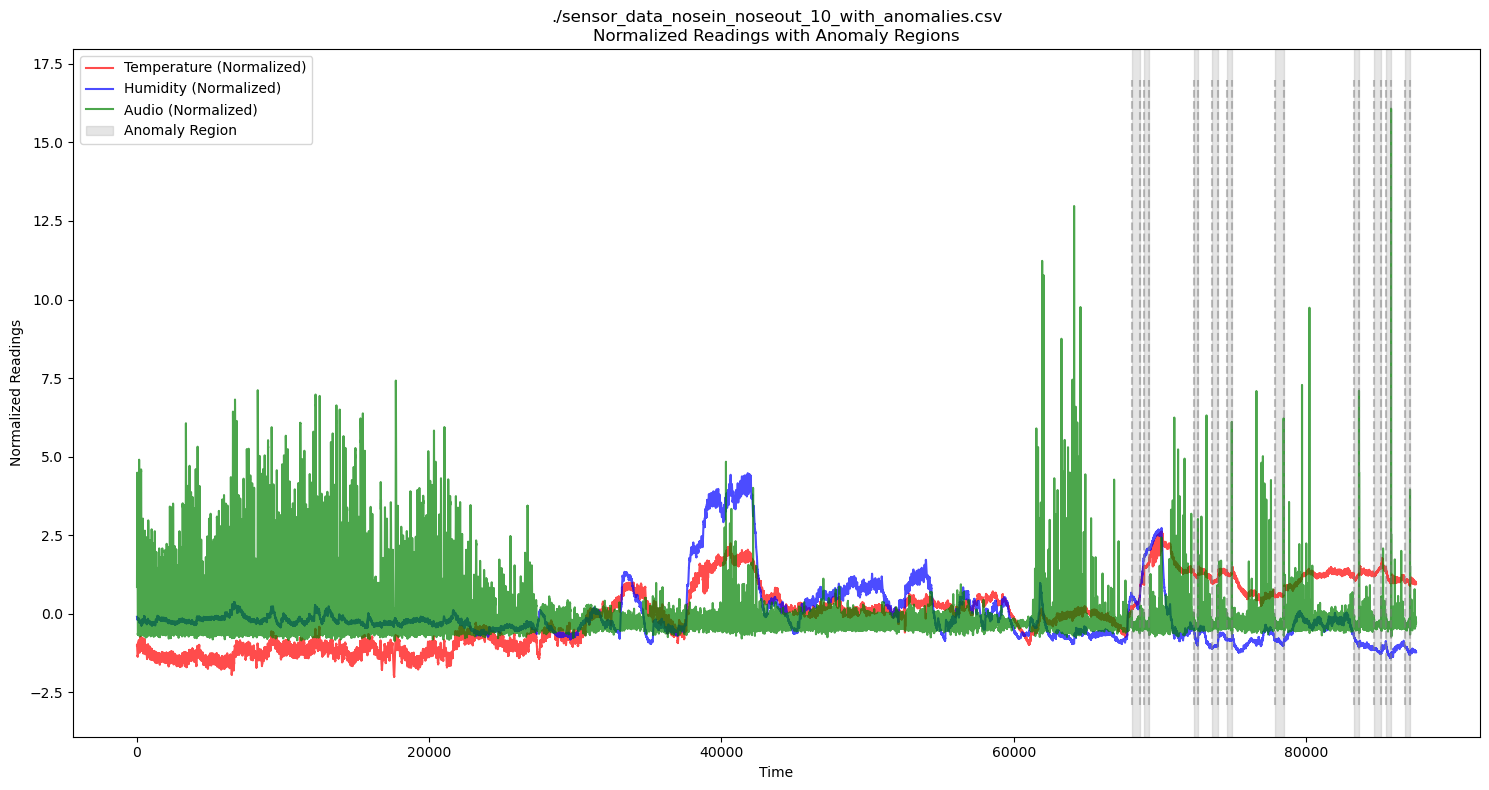

In [140]:
# Normalize the data
temp_mean = np.mean(temp_readings)
temp_std = np.std(temp_readings)
temp_normalized = (temp_readings - temp_mean) / temp_std

hum_mean = np.mean(hum_readings) 
hum_std = np.std(hum_readings)
hum_normalized = (hum_readings - hum_mean) / hum_std

audio_mean = np.mean(audio_readings)
audio_std = np.std(audio_readings)
audio_normalized = (audio_readings - audio_mean) / audio_std

# pressure_mean = np.mean(pressure_readings)
# pressure_std = np.std(pressure_readings)
# pressure_normalized = (pressure_readings - pressure_mean) / pressure_std

# blood_oxygen_mean = np.mean(blood_oxygen_readings)
# blood_oxygen_std = np.std(blood_oxygen_readings)
# blood_oxygen_normalized = (blood_oxygen_readings - blood_oxygen_mean) / blood_oxygen_std

plt.figure(figsize=(15, 8))

# Plot normalized readings
plt.plot(t, temp_normalized, label='Temperature (Normalized)', color='red', alpha=0.7)
plt.plot(t, hum_normalized, label='Humidity (Normalized)', color='blue', alpha=0.7)
plt.plot(t, audio_normalized, label='Audio (Normalized)', color='green', alpha=0.7)
# plt.plot(t, pressure_normalized, label='Pressure (Normalized)', color='orange', alpha=0.7)
# plt.plot(t, blood_oxygen_normalized, label='Blood Oxygen (Normalized)', color='purple', alpha=0.7)

# Plot vertical lines for anomalies
y_min, y_max = plt.ylim()
for adj_start, adj_end in adj_anomaly_intervals:
    # Plot vertical lines at start and end of anomaly intervals
    plt.vlines(x=adj_start, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    plt.vlines(x=adj_end, ymin=y_min, ymax=y_max, colors='gray', linestyles='dashed', alpha=0.5)
    
    # Fill the anomaly region
    plt.axvspan(adj_start, adj_end, color='gray', alpha=0.2, label="Anomaly Region" if adj_start == adj_anomaly_intervals[0][0] else "")

plt.xlabel('Time')
plt.ylabel('Normalized Readings')
plt.title(f'{datafile}\nNormalized Readings with Anomaly Regions')
plt.legend()
plt.tight_layout()
plt.savefig(f'{datafile}_temp_hum_audio_with_anomaly_regions_normalized.png')
plt.show()
